# 2.3のベイズ更新の実験をRubyで行う

In [1]:
# Arrayクラスに内積計算のクラスを追加
class Array
  # 「*」で配列同士の内積を計算
  def *(another_array)
    left_vector = check_elements_and_convert_like_number(self)
    right_vector = check_elements_and_convert_like_number(another_array)
    result = 0.0
    left_vector.zip(right_vector){|e| result += e.inject(:*)}
    result
  end

  # 要素チェックと警告
  def check_elements_and_convert_like_number(target_array)
    target_array.map do |e|
      unless e.class == Float or e.class == Fixnum or e.class == Rational or e.class == BigDecimal
        print("配列に数値以外の #{e.class}オブジェクト「#{e}」が入っているよ。#{e.to_i}に置き換えたよ。")
        e.to_i
      else
        e
      end
    end
    target_array
  end

end

:check_elements_and_convert_like_number

In [2]:
# ベイズ更新
def bayesian_upadate(prior_probability, obserbation)
  
  coin_types = [:w1, :w2, :w3]
  head_probabilities = {w1:  0.8, w2: 0.6, w3: 0.3}
  tail_probabilities = head_probabilities.map{ |v, e| [v,  (1 - e).round(2)]}.to_h
  posterior_probability = Hash.new
  
  coin_types.each do | coin_type |
    if obserbation == "H"
      posterior_probability[coin_type] = 
                             (head_probabilities[coin_type] * prior_probability[coin_type]) / (prior_probability.values * head_probabilities.values)
    elsif obserbation == "T"
      posterior_probability[coin_type] = 
                             (tail_probabilities[coin_type] * prior_probability[coin_type]) / (prior_probability.values *  tail_probabilities .values)
    end
  end
  posterior_probability
end

:bayesian_upadate

In [3]:
# コイントスの実験（表の出る確率を0.8とする）
head_probability = 0.8
obserbations = []

100.times do |i|
  rand_num = rand(2)
  if head_probability >= rand_num
    obserbations << "H"
  else
    obserbations << "T"
  end
end


# 患側結果（obserbations）を元に事前確率を更新していく
prior_probability = {w1: 0.1, w2: 0.4, w3: 0.5}
plot_data = [prior_probability.values]

update_probability = prior_probability
obserbations.each do |obserbation|
  update_probability = bayesian_upadate(update_probability, obserbation)
  plot_data.push(update_probability.values)
end

# 結果確認用
#obserbations.zip(plot_data){|e| puts(e)}

["H", "H", "T", "H", "H", "H", "H", "H", "T", "T", "T", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "T", "H", "T", "H", "T", "H", "T", "H", "H", "H", "T", "H", "H", "T", "H", "T", "T", "H", "H", "H", "H", "T", "H", "H", "H", "H", "T", "T", "T", "H", "T", "T", "H", "T", "H", "T", "H", "H", "T", "T", "H", "T", "H", "T", "H", "T", "H", "T", "H", "H", "H", "T", "T", "H", "H", "T", "T", "H", "H", "T", "T", "T", "T", "T", "H", "T", "H", "T", "H", "H", "H", "H", "H", "H"]

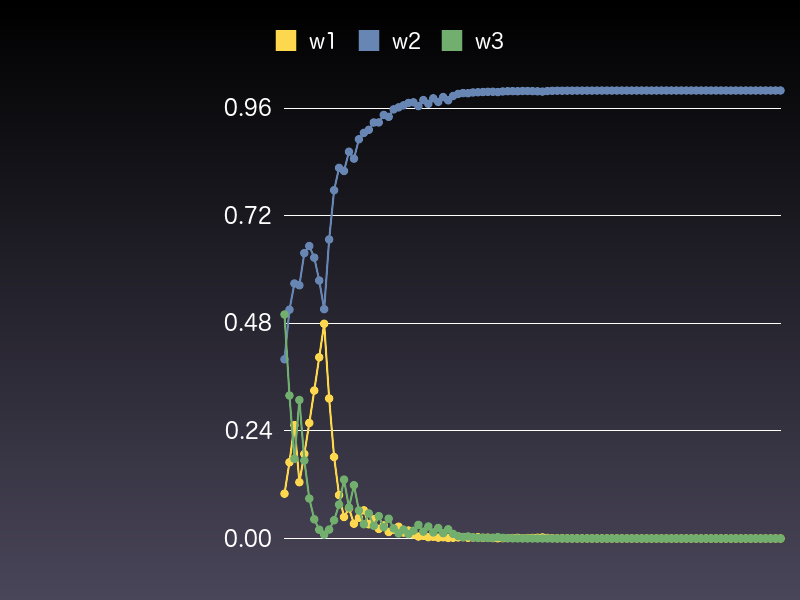

In [4]:
require 'gruff'
g = Gruff::Line.new
g.font = "/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
g.data 'w1', plot_data.map{|e| e[0]}
g.data 'w2', plot_data.map{|e| e[1]}
g.data 'w3', plot_data.map{|e| e[2]}
g